Подготовка файла с данными

In [1]:
import pandas as pd
import numpy as np

# Реальные средние температуры (примерные данные) для городов по сезонам
seasonal_temperatures = {
    "New York": {"winter": 0, "spring": 10, "summer": 25, "autumn": 15},
    "London": {"winter": 5, "spring": 11, "summer": 18, "autumn": 12},
    "Paris": {"winter": 4, "spring": 12, "summer": 20, "autumn": 13},
    "Tokyo": {"winter": 6, "spring": 15, "summer": 27, "autumn": 18},
    "Moscow": {"winter": -10, "spring": 5, "summer": 18, "autumn": 8},
    "Sydney": {"winter": 12, "spring": 18, "summer": 25, "autumn": 20},
    "Berlin": {"winter": 0, "spring": 10, "summer": 20, "autumn": 11},
    "Beijing": {"winter": -2, "spring": 13, "summer": 27, "autumn": 16},
    "Rio de Janeiro": {"winter": 20, "spring": 25, "summer": 30, "autumn": 25},
    "Dubai": {"winter": 20, "spring": 30, "summer": 40, "autumn": 30},
    "Los Angeles": {"winter": 15, "spring": 18, "summer": 25, "autumn": 20},
    "Singapore": {"winter": 27, "spring": 28, "summer": 28, "autumn": 27},
    "Mumbai": {"winter": 25, "spring": 30, "summer": 35, "autumn": 30},
    "Cairo": {"winter": 15, "spring": 25, "summer": 35, "autumn": 25},
    "Mexico City": {"winter": 12, "spring": 18, "summer": 20, "autumn": 15},
}

# Сопоставление месяцев с сезонами
month_to_season = {12: "winter", 1: "winter", 2: "winter",
                   3: "spring", 4: "spring", 5: "spring",
                   6: "summer", 7: "summer", 8: "summer",
                   9: "autumn", 10: "autumn", 11: "autumn"}

# Генерация данных о температуре
def generate_realistic_temperature_data(cities, num_years=10):
    dates = pd.date_range(start="2010-01-01", periods=365 * num_years, freq="D")
    data = []

    for city in cities:
        for date in dates:
            season = month_to_season[date.month]
            mean_temp = seasonal_temperatures[city][season]
            # Добавляем случайное отклонение
            temperature = np.random.normal(loc=mean_temp, scale=5)
            data.append({"city": city, "timestamp": date, "temperature": temperature})

    df = pd.DataFrame(data)
    df['season'] = df['timestamp'].dt.month.map(lambda x: month_to_season[x])
    return df

# Генерация данных
data = generate_realistic_temperature_data(list(seasonal_temperatures.keys()))
data.to_csv('temperature_data.csv', index=False)


In [2]:
df = pd.read_csv('temperature_data.csv')

In [3]:
df.head()

,city,timestamp,temperature,season
0,New York,2010-01-01,-0.129196,winter
1,New York,2010-01-02,7.848297,winter
2,New York,2010-01-03,3.583289,winter
3,New York,2010-01-04,-1.502136,winter
4,New York,2010-01-05,-8.537205,winter


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54750 entries, 0 to 54749
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         54750 non-null  object 
 1   timestamp    54750 non-null  object 
 2   temperature  54750 non-null  float64
 3   season       54750 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.7+ MB


In [8]:
df.shape

(54750, 4)

In [7]:
import time

In [8]:
cities = df['city'].unique()
cities

array(['New York', 'London', 'Paris', 'Tokyo', 'Moscow', 'Sydney',
       'Berlin', 'Beijing', 'Rio de Janeiro', 'Dubai', 'Los Angeles',
       'Singapore', 'Mumbai', 'Cairo', 'Mexico City'], dtype=object)

In [22]:
sequential_start = time.time()

df['rolling_mean'] = (
    df.groupby('city')['temperature']
    .transform(lambda x: x.rolling(window=30, min_periods=1).mean())
)
df['rolling_std'] = (
    df.groupby('city')['temperature']
    .transform(lambda x: x.rolling(window=30, min_periods=1).std())
)

df["is_anomaly"] = (df["temperature"] - df["rolling_mean"]).abs() > 2 * df["rolling_std"]

by_mean_temp = df.groupby(['city', 'season'])['temperature'].mean()
by_std_temp = df.groupby(['city', 'season'])['temperature'].std()

mean_std = pd.concat([by_mean_temp, by_std_temp], axis=1)
mean_std.columns = ['mean_temp', 'std_temp']

print(f"Sequential time: {time.time() - sequential_start}")

Sequential time: 0.1998136043548584


In [36]:
df.head(30)

,city,timestamp,temperature,season,rolling_mean,rolling_std,is_anomaly
0,New York,2010-01-01,-5.514353,winter,-5.514353,NaN,False
1,New York,2010-01-02,3.071257,winter,-1.221548,6.070943,False
2,New York,2010-01-03,2.024250,winter,-0.139616,4.684005,False
3,New York,2010-01-04,2.444399,winter,0.506388,4.036816,False
4,New York,2010-01-05,4.923071,winter,1.389725,4.015387,False
5,New York,2010-01-06,-3.873726,winter,0.512483,4.185210,False
6,New York,2010-01-07,6.437442,winter,1.358906,4.428507,False
7,New York,2010-01-08,-1.658866,winter,0.981684,4.236552,False
8,New York,2010-01-09,-0.535981,winter,0.813055,3.995091,False
9,New York,2010-01-10,8.547542,winter,1.586503,4.491054,False


In [23]:
mean_std

mean_temp  std_temp
city           season                     
Beijing        autumn  16.193493  5.226902
               spring  12.856628  4.834730
               summer  27.170522  4.894345
               winter  -2.048120  5.066851
Berlin         autumn  11.188349  5.032604
               spring  10.193048  4.823523
               summer  20.269284  4.941103
               winter   0.087960  4.858635
Cairo          autumn  25.121118  5.022998
               spring  24.949752  4.984841
               summer  34.924153  4.979591
               winter  14.985170  5.158831
Dubai          autumn  30.214875  5.073833
               spring  30.005214  4.948700
               summer  39.907885  5.072877
               winter  19.786448  4.878737
London         autumn  11.933521  4.933076
               spring  11.064921  4.857615
               summer  17.638819  5.024799
               winter   5.144653  4.809080
Los Angeles    autumn  19.858197  4.821312
               spring  18.073523  5.099535
               summer  24.986024  5.093892
               winter  15.008612  4.950368
Mexico City    autumn  14.665436  5.124654
               spring  18.292923  4.780825
               summer  19.914060  4.902822
               winter  11.857646  5.025074
Moscow         autumn   8.171098  4.799492
               spring   5.042102  5.030271
               summer  17.843179  5.085148
               winter -10.131209  4.953181
Mumbai         autumn  30.016553  5.352852
               spring  29.827195  4.976917
               summer  34.811978  4.941218
               winter  24.844869  4.753029
New York       autumn  14.915467  4.863612
               spring  10.236988  4.927690
               summer  24.990843  4.846326
               winter  -0.158516  5.027456
Paris          autumn  12.931547  5.041562
               spring  12.145328  5.093057
               summer  19.871698  5.021000
               winter   3.983586  5.043575
Rio de Janeiro autumn  24.856781  5.182437
               spring  25.023927  5.226225
               summer  29.679768  4.982384
               winter  19.964473  5.021743
Singapore      autumn  26.894607  4.786579
               spring  28.014343  4.903896
               summer  28.272713  4.949466
               winter  27.121301  4.889265
Sydney         autumn  20.049971  4.999663
               spring  18.115566  4.871222
               summer  25.051105  4.874452
               winter  11.846550  4.952202
Tokyo          autumn  18.001789  5.046904
               spring  15.101349  5.069849
               summer  27.139664  5.201654
               winter   5.789836  5.007682

In [14]:
city_groups = list(df.groupby('city'))

# Trend line

In [9]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['days_since_start'] = (df['timestamp'] - df['timestamp'].min()).dt.days

0.00040279363523390875
5.0424948876423713e-05
5.847805372007077e-05
0.0002666400417657408
0.00033365547167910065
0.00011291913262404507
0.00010903544410693958
0.00024111547938383035
0.00013025418824545753
0.00012507941681298872
0.00011332398407702069
-6.454948687904635e-05
0.00012091653816865034
0.000334913092698539
-7.393750446810109e-07


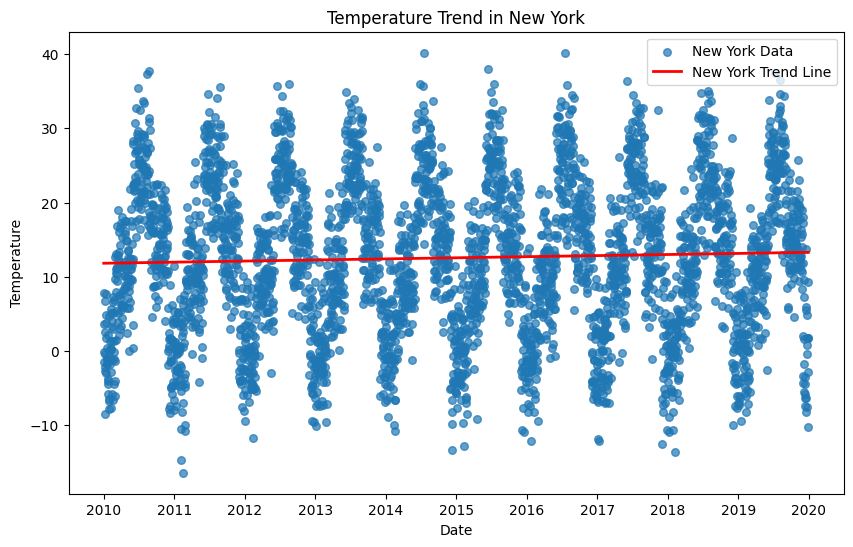

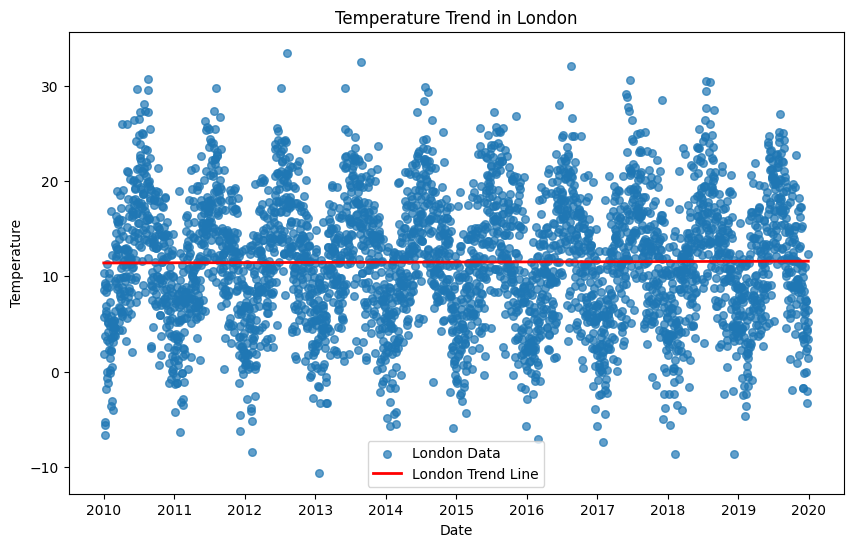

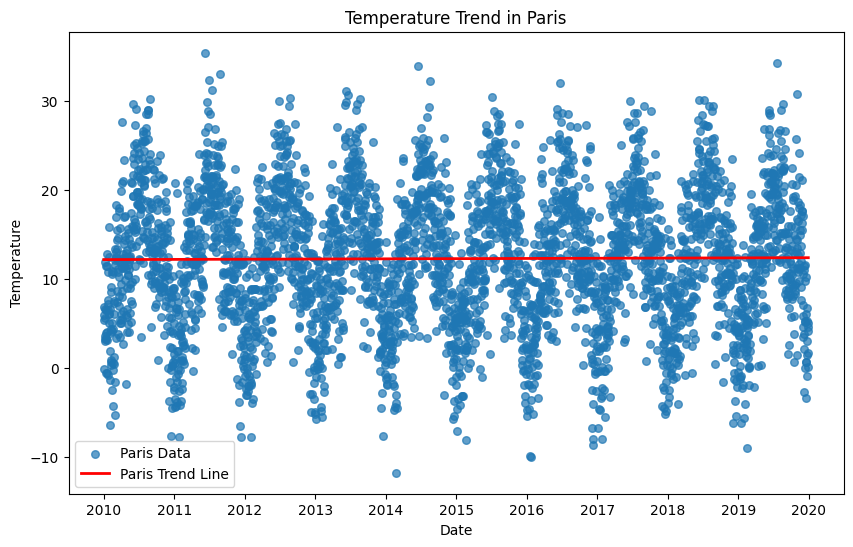

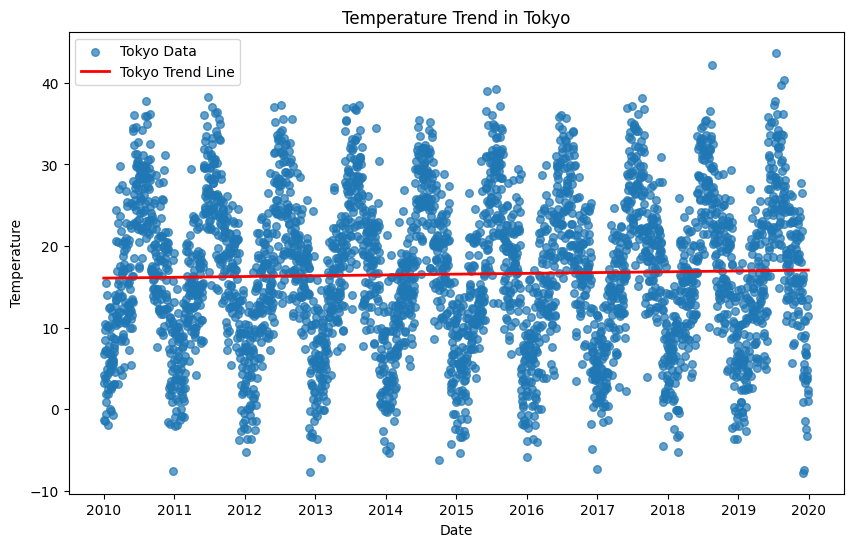

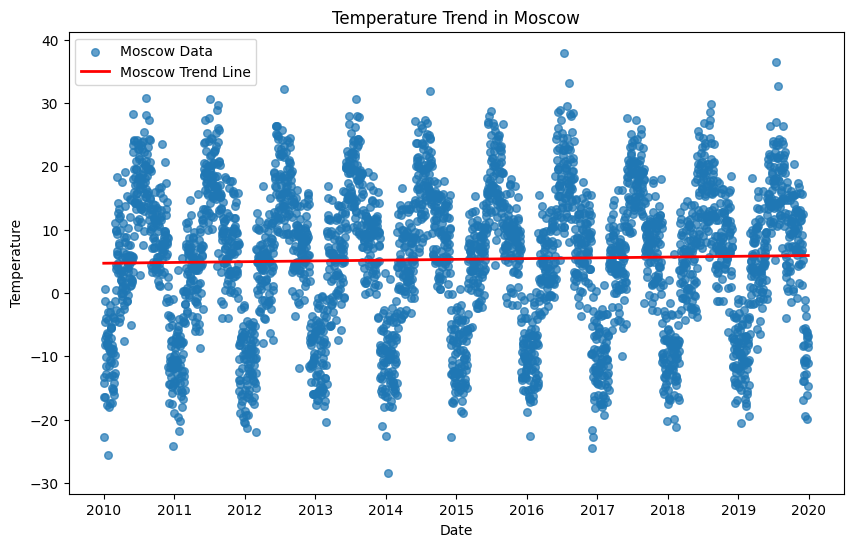

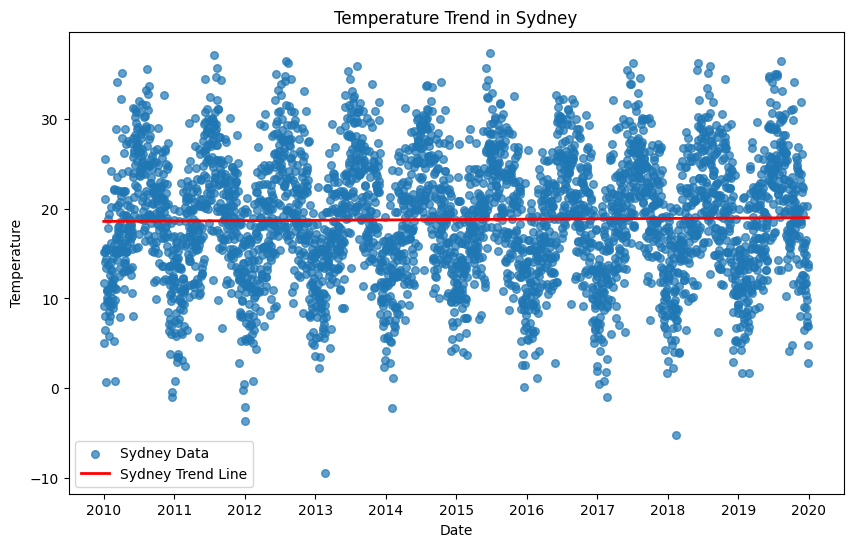

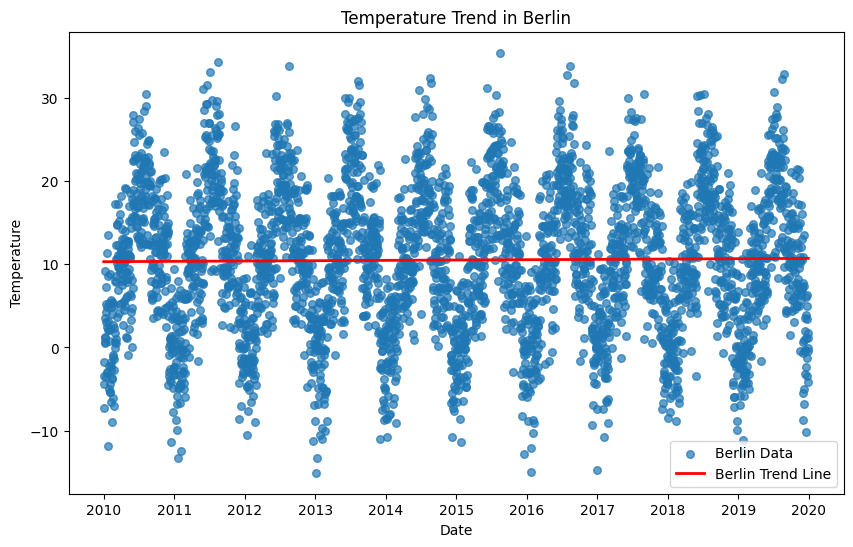

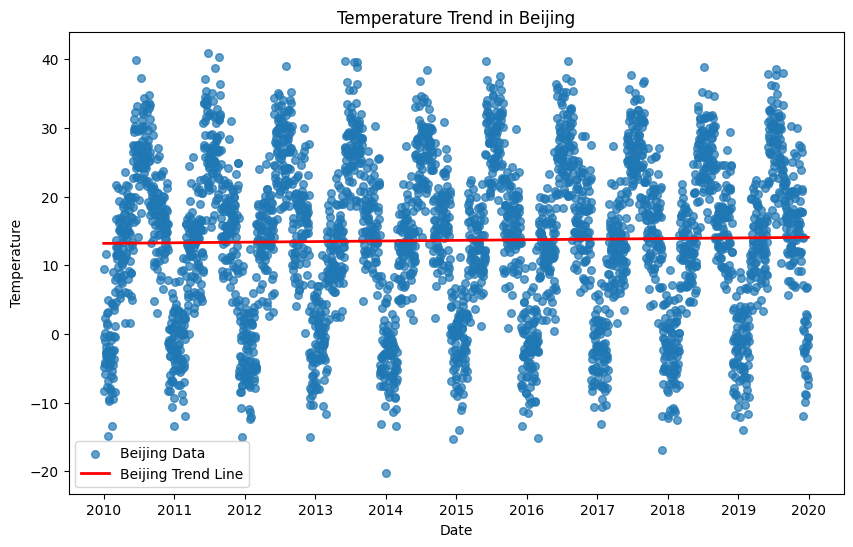

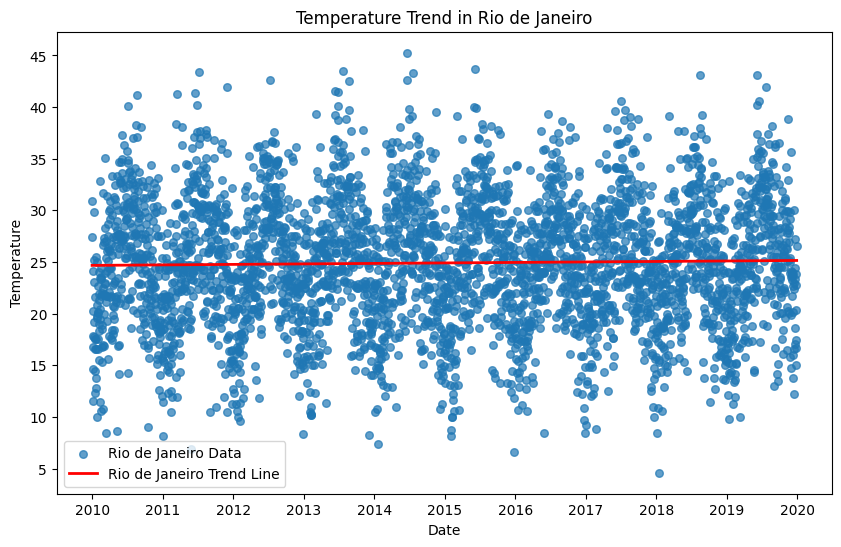

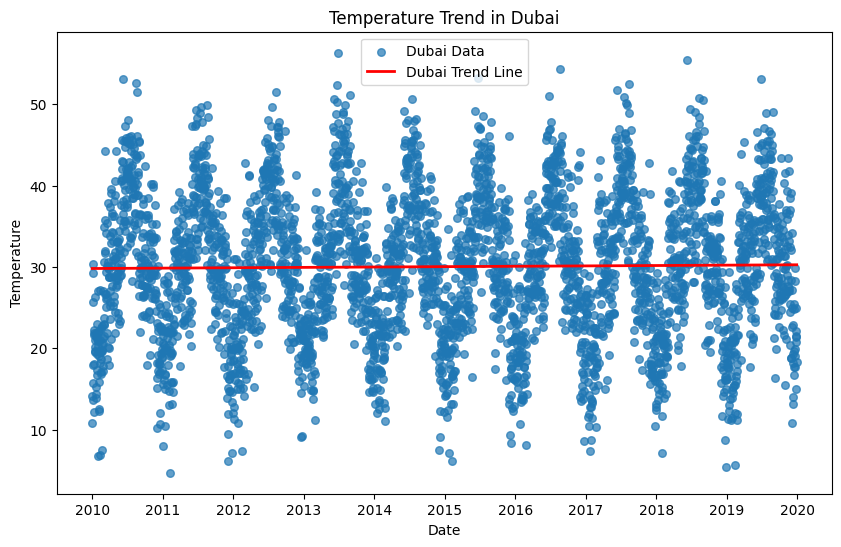

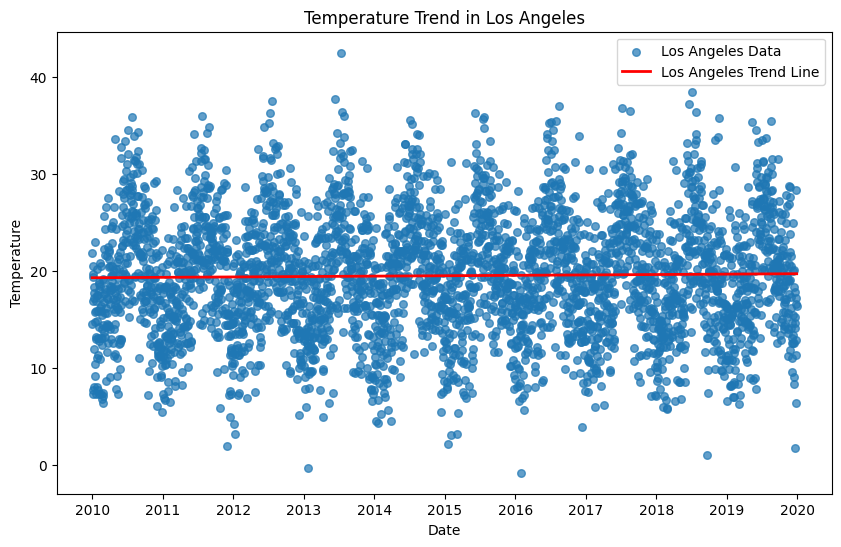

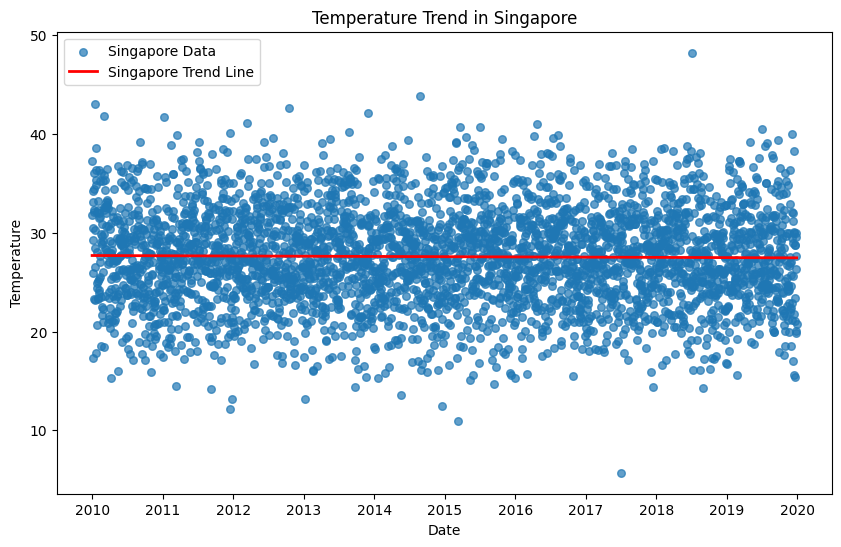

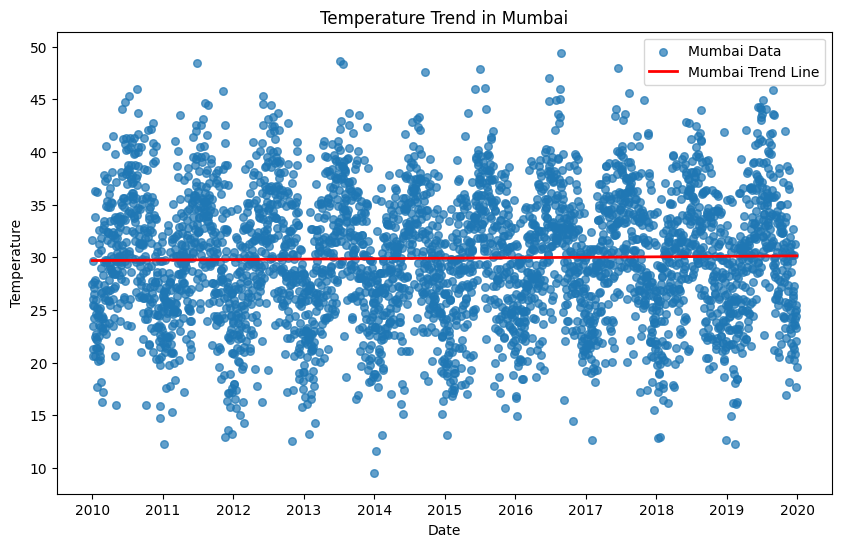

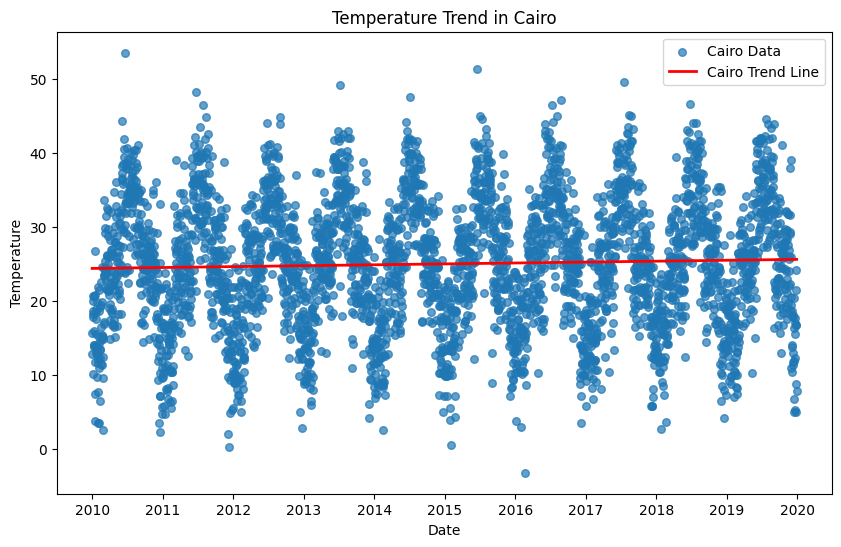

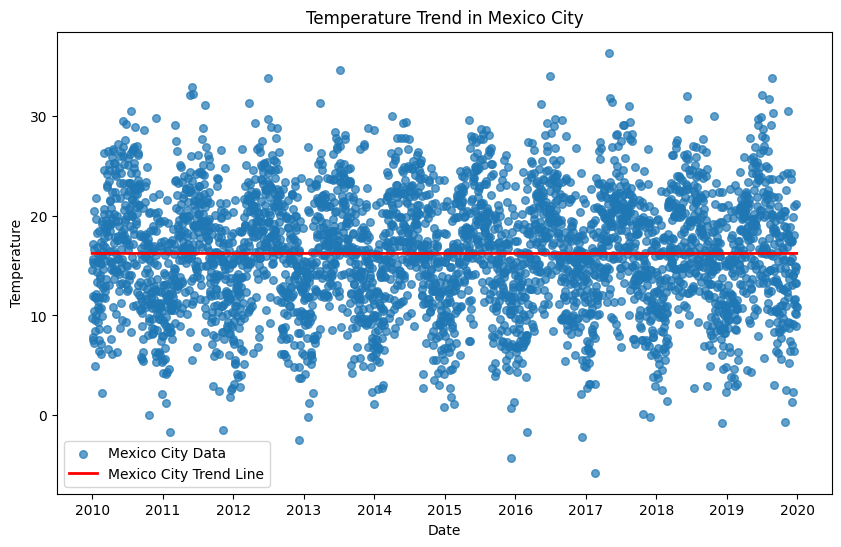

In [17]:
for city in cities:
  plt.figure(figsize=(10, 6))

  city_data = df[df['city'] == city]
  X = city_data[['days_since_start']]
  y = city_data['temperature']

  lin_reg = LinearRegression()
  lin_reg.fit(X, y)

  trend_line = lin_reg.predict(X)
  coef = lin_reg.coef_[0]
  print(coef)

  plt.scatter(city_data['timestamp'], city_data['temperature'], label=f"{city} Data", s=30, alpha=0.7)

  plt.plot(city_data['timestamp'], trend_line, label=f"{city} Trend Line", linewidth=2, color='red')

  plt.xlabel('Date')
  plt.ylabel('Temperature')
  plt.title(f'Temperature Trend in {city}')
  plt.legend()


# Сравнение последовательного и параллельного исполнения.

Отрисовка графиков была выключена, картинки сохраняются в файлы для корректности сравнения.

In [24]:
start_sequential = time.time()


for city in cities:
  plt.figure(figsize=(10, 6))

  city_data = df[df['city'] == city]
  X = city_data[['days_since_start']]
  y = city_data['temperature']

  lin_reg = LinearRegression()
  lin_reg.fit(X, y)

  trend_line = lin_reg.predict(X)
  coef = lin_reg.coef_[0]
  print(coef)

  plt.scatter(city_data['timestamp'], city_data['temperature'], label=f"{city} Data", s=30, alpha=0.7)

  plt.plot(city_data['timestamp'], trend_line, label=f"{city} Trend Line", linewidth=2, color='red')

  plt.xlabel('Date')
  plt.ylabel('Temperature')
  plt.title(f'Temperature Trend in {city}')
  plt.legend()

  plt.savefig(f"{city}_temperature_trend.png")
  plt.close()

print("===============================")
print(f"Sequential time: {time.time() - start_sequential}")

0.00040279363523390875
5.0424948876423713e-05
5.847805372007077e-05
0.0002666400417657408
0.00033365547167910065
0.00011291913262404507
0.00010903544410693958
0.00024111547938383035
0.00013025418824545753
0.00012507941681298872
0.00011332398407702069
-6.454948687904635e-05
0.00012091653816865034
0.000334913092698539
-7.393750446810109e-07
Sequential time: 10.934722900390625


In [25]:
def process_city(city, df):
    plt.figure(figsize=(10, 6))

    city_data = df[df['city'] == city]
    X = city_data[['days_since_start']]
    y = city_data['temperature']

    lin_reg = LinearRegression()
    lin_reg.fit(X, y)

    trend_line = lin_reg.predict(X)
    coef = lin_reg.coef_[0]
    print(f"City: {city}, Coefficient: {coef}")

    plt.scatter(city_data['timestamp'], city_data['temperature'], label=f"{city} Data", s=30, alpha=0.7)
    plt.plot(city_data['timestamp'], trend_line, label=f"{city} Trend Line", linewidth=2, color='red')

    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.title(f'Temperature Trend in {city}')
    plt.legend()
    plt.savefig(f"{city}_temperature_trend_parallel.png")
    plt.close()

start_parallel = time.time()
Parallel(n_jobs=-1)(delayed(process_city)(city, df) for city in cities)
print("===============================")
print(f"Parallel time: {time.time() - start_parallel}")

Parallel time: 4.206364393234253


# API

In [15]:
city_to_country = {
    "New York": "US",
    "London": "GB",
    "Paris": "FR",
    "Tokyo": "JP",
    "Moscow": "RU",
    "Sydney": "AU",
    "Berlin": "DE",
    "Beijing": "CN",
    "Rio de Janeiro": "BR",
    "Dubai": "AE",
    "Los Angeles": "US",
    "Singapore": "SG",
    "Mumbai": "IN",
    "Cairo": "EG",
    "Mexico City": "MX"
}

In [ ]:
import requests
import time

token = <INSERT TOKEN HERE>

# Сравнение синхронного и асинхронного обращения к API

### Synchronous

In [26]:
import time

city_to_temperature = {}

seq_start = time.time()
for city in cities:
  temperature_call = f"https://api.openweathermap.org/data/2.5/weather?q={city},{city_to_country[city]}&APPID={token}&units=metric"
  response = requests.get(temperature_call)
  data = response.json()
  city_to_temperature[city] = data['main']['temp']

print(f"Sequential time: {time.time() - seq_start}")

city_to_temperature

Sequential time: 2.021510362625122


{'New York': -0.99,
 'London': 0.57,
 'Paris': 1.14,
 'Tokyo': 2.86,
 'Moscow': -3.76,
 'Sydney': 27.12,
 'Berlin': 0.06,
 'Beijing': -6.06,
 'Rio de Janeiro': 27.62,
 'Dubai': 17.96,
 'Los Angeles': 15.73,
 'Singapore': 25.68,
 'Mumbai': 24.99,
 'Cairo': 14.42,
 'Mexico City': 20.52}

### Asynchronous

In [25]:
import asyncio
import aiohttp

city_to_temperature = {}

async def fetch_temperature(session, city):
  temperature_call = f"https://api.openweathermap.org/data/2.5/weather?q={city},{city_to_country[city]}&APPID={token}&units=metric"
  async with session.get(temperature_call) as response:
    data = await response.json()
    city_to_temperature[city] = data['main']['temp']

async_start = time.time()

async with aiohttp.ClientSession() as session:
  tasks = [fetch_temperature(session, city) for city in cities]
  await asyncio.gather(*tasks)

print(f"Async time: {time.time() - async_start}")

city_to_temperature

Async time: 0.2543759346008301


{'Singapore': 25.68,
 'Tokyo': 2.86,
 'Cairo': 14.42,
 'New York': -0.99,
 'Moscow': -3.76,
 'Paris': 1.14,
 'Berlin': 0.06,
 'Los Angeles': 15.82,
 'Dubai': 17.96,
 'Sydney': 27.12,
 'Mumbai': 24.99,
 'London': 0.57,
 'Rio de Janeiro': 27.25,
 'Mexico City': 19.97,
 'Beijing': -6.06}

In [23]:
from datetime import datetime

def is_anomaly(city):
  season = month_to_season[datetime.now().month]
  temp = city_to_temperature[city]
  mean = mean_std.loc[city, season]['mean_temp']
  std = mean_std.loc[city, season]['std_temp']

  return abs(temp - mean) > 2 * std

In [24]:
for city in cities:
  print(city, is_anomaly(city))

New York False
London False
Paris False
Tokyo False
Moscow False
Sydney True
Berlin False
Beijing False
Rio de Janeiro False
Dubai False
Los Angeles False
Singapore False
Mumbai False
Cairo False
Mexico City False
